In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

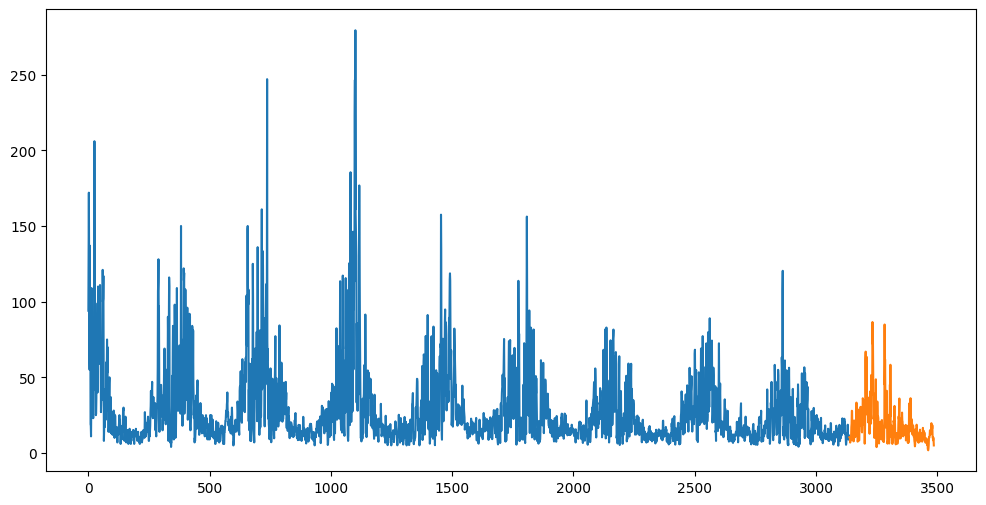

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

model_data = pd.read_csv("../../przygotowanie_danych/model_data.csv")
X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine", "day_number_in_year"]]
y = model_data['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,shuffle=False)


plt.figure(figsize=(12, 6))
plt.plot(y_train)
plt.plot(y_test)
plt.show()

Średni błąd kwadratowy (MSE): 294.90848095413025
Procentowa zgodność: -81.39%


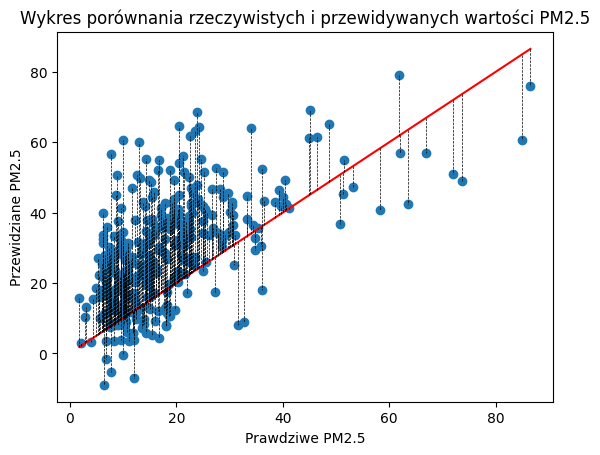

,Rzeczywiste wartości (y_test),Przewidywane wartości (y_pred),Różnica
0,10.46,20.708592,-10.248592
1,10.38,20.145259,-9.765259
2,10.29,27.728872,-17.438872
3,6.89,21.116432,-14.226432
4,7.56,23.952898,-16.392898
...,...,...,...
344,9.90,22.486289,-12.586289
345,8.40,8.026085,0.373915
346,10.20,12.493239,-2.293239
347,8.40,14.189788,-5.789788


In [13]:
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)



mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Średni błąd kwadratowy (MSE): {mse}")
percent_match = r2 * 100
print(f"Procentowa zgodność: {percent_match:.2f}%")
y_test = y_test.reset_index(drop=True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', label='y=x')
plt.scatter(y_test, y_pred)
for i in range(len(y_test)):
    plt.plot([y_test[i], y_test[i]], [y_test[i], y_pred[i]], 'k--', lw=0.5)
plt.xlabel("Prawdziwe PM2.5")
plt.ylabel("Przewidziane PM2.5")
plt.title("Wykres porównania rzeczywistych i przewidywanych wartości PM2.5")
plt.show()
results = pd.DataFrame({'Rzeczywiste wartości (y_test)': y_test, 'Przewidywane wartości (y_pred)': y_pred})
results['Różnica'] = results['Rzeczywiste wartości (y_test)'] - results['Przewidywane wartości (y_pred)']
results
